In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('sp500_with_indicators.csv')
print()
df.head

<bound method NDFrame.head of                             Date         Open         High          Low  \
0      1928-03-13 00:00:00-05:00    17.920000    17.920000    17.920000   
1      1928-03-14 00:00:00-05:00    17.930000    17.930000    17.930000   
2      1928-03-15 00:00:00-05:00    18.070000    18.070000    18.070000   
3      1928-03-16 00:00:00-05:00    18.260000    18.260000    18.260000   
4      1928-03-19 00:00:00-05:00    18.360001    18.360001    18.360001   
...                          ...          ...          ...          ...   
24185  2024-06-24 00:00:00-04:00  5459.580078  5490.660156  5447.589844   
24186  2024-06-25 00:00:00-04:00  5460.729980  5472.879883  5446.560059   
24187  2024-06-26 00:00:00-04:00  5460.709961  5483.140137  5451.870117   
24188  2024-06-27 00:00:00-04:00  5473.589844  5490.810059  5467.540039   
24189  2024-06-28 00:00:00-04:00  5488.479980  5523.640137  5451.120117   

             Close      Volume  Dividends  Stock Splits       SMA_20 

In [1]:
# Create the target variable
#adjust thereshold to make every class have similar numer of data
threshold = 0.01
df2 = df
# Create the 'Close_Next_Day' column if it doesn't exist
df2['Close_Next_Day'] = df2['Close'].shift(-1)
df2['Change'] = (df2['Close'] - df2['Close'].shift(1))/df2['Close'] #create new feature
df2['Up'] = (df2['High'] - df2['Close'])/df2['Close']
df2['Down'] = (df2['Low'] - df2['Close'])/df2['Close']
df2['Delta_SMA'] = df2['SMA_20'] - df2['SMA_50']
df2['Delta_EMA'] = df2['EMA_20'] - df2['EMA_50']

# Recreate the target variable
df2['Target'] = df2.apply(
    lambda row: 1 if (row['Close_Next_Day'] > row['Close'] * (1 + threshold)) else (
                -1 if (row['Close_Next_Day'] < row['Close'] * (1 - threshold)) else 0),
    axis=1
)

# Drop the last row as it will have NaN in the 'Close_Next_Day'
df2 = df2.dropna()
df2 = df2[(df2['Volume'] != 0) & (df2['Up'] != 0) & (df2['Down'] != 0)]
df2 = df2[df2['Volume']!=0]
df2

NameError: name 'df' is not defined

In [24]:
df2['Target'].value_counts()

Target
 1    6259
 0    4396
-1    4217
Name: count, dtype: int64

In [25]:
df2.describe().T

count          mean           std           min  \
Open            14872.0  9.375308e+02  1.181767e+03  0.000000e+00   
High            14872.0  9.753506e+02  1.163066e+03  5.283000e+01   
Low             14872.0  9.635541e+02  1.150272e+03  5.135000e+01   
Close           14872.0  9.697557e+02  1.157129e+03  5.232000e+01   
Volume          14872.0  1.406778e+09  1.840145e+09  1.950000e+06   
Dividends       14872.0  0.000000e+00  0.000000e+00  0.000000e+00   
Stock Splits    14872.0  0.000000e+00  0.000000e+00  0.000000e+00   
SMA_20          14872.0  9.666262e+02  1.151799e+03  5.500000e+01   
SMA_50          14872.0  9.616499e+02  1.143865e+03  5.648800e+01   
EMA_20          14872.0  9.666420e+02  1.151681e+03  5.554703e+01   
EMA_50          14872.0  9.617010e+02  1.143627e+03  5.687035e+01   
RSI             14872.0  5.358724e+01  1.260376e+01  1.135964e+01   
MACD            14872.0  2.343052e+00  1.663277e+01 -2.370202e+02   
MACD_Signal     14872.0  2.334910e+00  1.556284e+01 -1.986407e+02   
MACD_Diff       14872.0  8.141783e-03  5.211806e+00 -6.122110e+01   
Close_Next_Day  14872.0  9.732408e+02  1.162765e+03  5.232000e+01   
Change          14872.0 -5.115877e-05  1.016113e-02 -2.573386e-01   
Up              14872.0  6.898086e-03  6.937126e-03  3.236181e-06   
Down            14872.0 -7.114004e-03  6.267653e-03 -1.016142e-01   
Delta_SMA       14872.0  4.976348e+00  3.579617e+01 -4.231780e+02   
Delta_EMA       14872.0  4.941050e+00  2.539781e+01 -2.592072e+02   
Target          14872.0  1.373050e-01  8.280123e-01 -1.000000e+00   

                         25%           50%           75%           max  
Open            0.000000e+00  4.423400e+02  1.340147e+03  5.441930e+03  
High            1.040275e+02  4.443550e+02  1.349105e+03  5.447250e+03  
Low             1.023375e+02  4.399250e+02  1.330343e+03  5.409130e+03  
Close           1.032075e+02  4.421500e+02  1.339152e+03  5.433740e+03  
Volume          2.143500e+07  2.446900e+08  3.065368e+09  1.145623e+10  
Dividends       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
Stock Splits    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
SMA_20          1.030836e+02  4.422407e+02  1.336272e+03  5.320753e+03  
SMA_50          1.028721e+02  4.405753e+02  1.334887e+03  5.204167e+03  
EMA_20          1.030940e+02  4.424227e+02  1.336984e+03  5.318976e+03  
EMA_50          1.027600e+02  4.414459e+02  1.338738e+03  5.233738e+03  
RSI             4.476224e+01  5.438591e+01  6.289170e+01  8.586217e+01  
MACD           -8.138548e-01  6.906919e-01  5.265945e+00  9.258371e+01  
MACD_Signal    -7.236174e-01  6.699558e-01  5.074898e+00  8.188411e+01  
MACD_Diff      -6.010503e-01  9.206230e-03  6.194650e-01  6.089580e+01  
Close_Next_Day  1.032200e+02  4.428150e+02  1.340225e+03  5.487030e+03  
Change         -4.469798e-03  2.527297e-04  4.813874e-03  1.037823e-01  
Up              2.317669e-03  5.476379e-03  9.261820e-03  2.573386e-01  
Down           -9.345851e-03 -5.827750e-03 -3.144633e-03 -3.780052e-06  
Delta_SMA      -1.782002e+00  1.384200e+00  1.092037e+01  2.014590e+02  
Delta_EMA      -8.720524e-01  1.390095e+00  1.006106e+01  1.282973e+02  
Target         -1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00

In [26]:
df2 = df2.drop(columns=['Open', 'Date','Dividends', 'Stock Splits', 'Close_Next_Day'], axis=1)

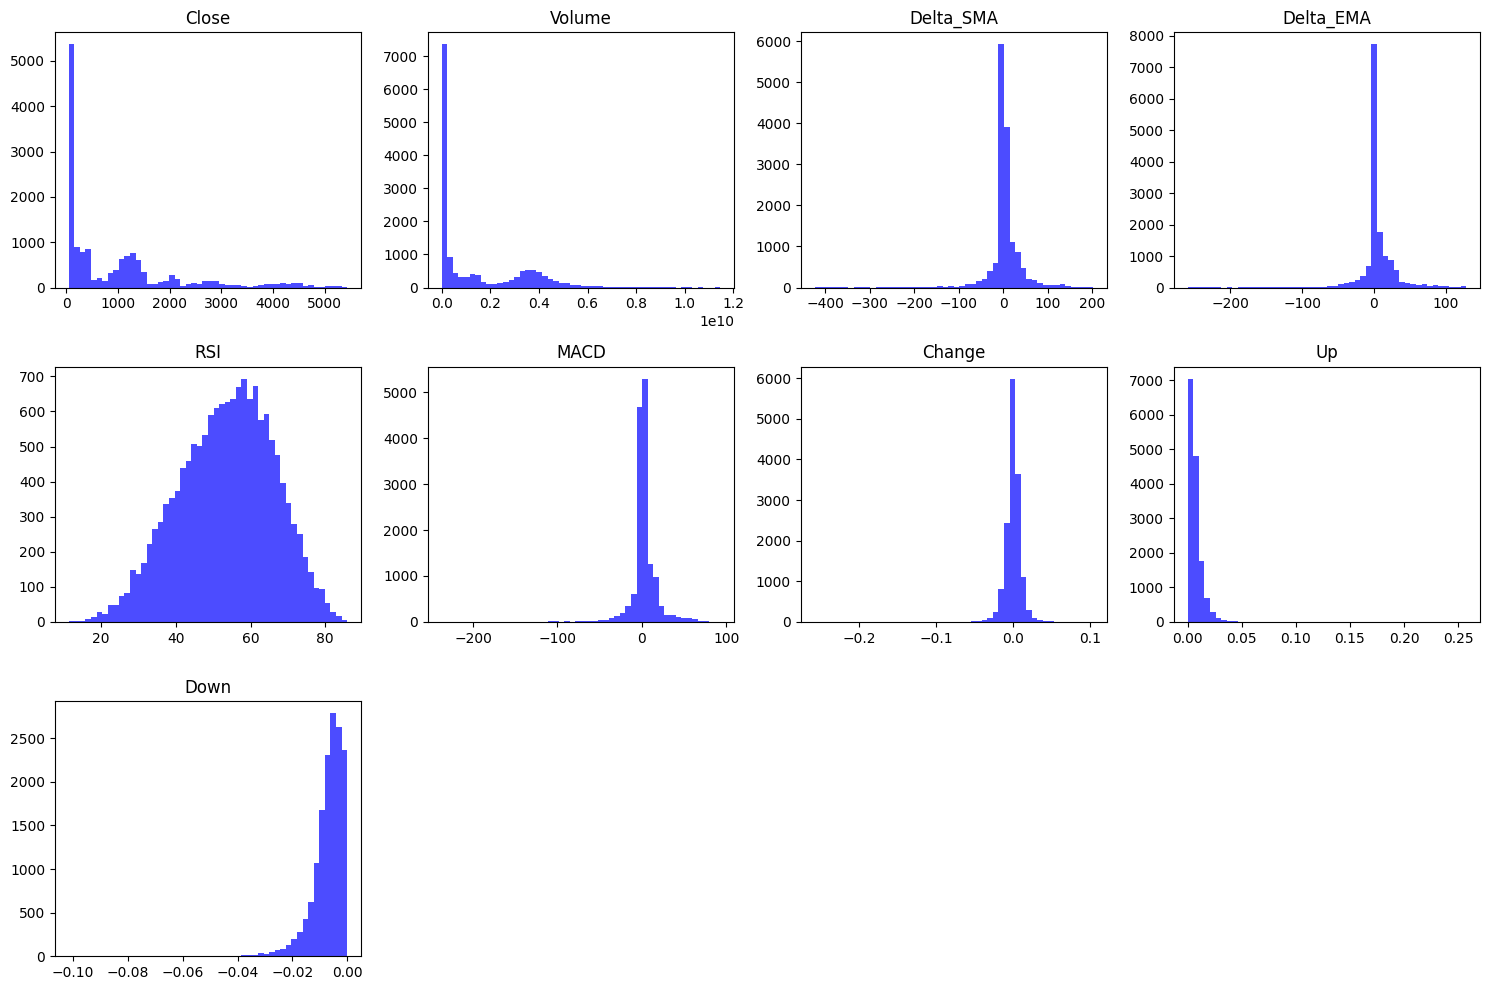

In [28]:
# Plot histograms for selected features
features_to_plot = [ 'Close', 'Volume', 'Delta_SMA', 'Delta_EMA', 'RSI', 'MACD', 'Change', 'Up', 'Down']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 4, i)
    plt.hist(df2[feature], bins=50, alpha=0.7, color='blue')
    plt.title(feature)

plt.tight_layout()
plt.show()

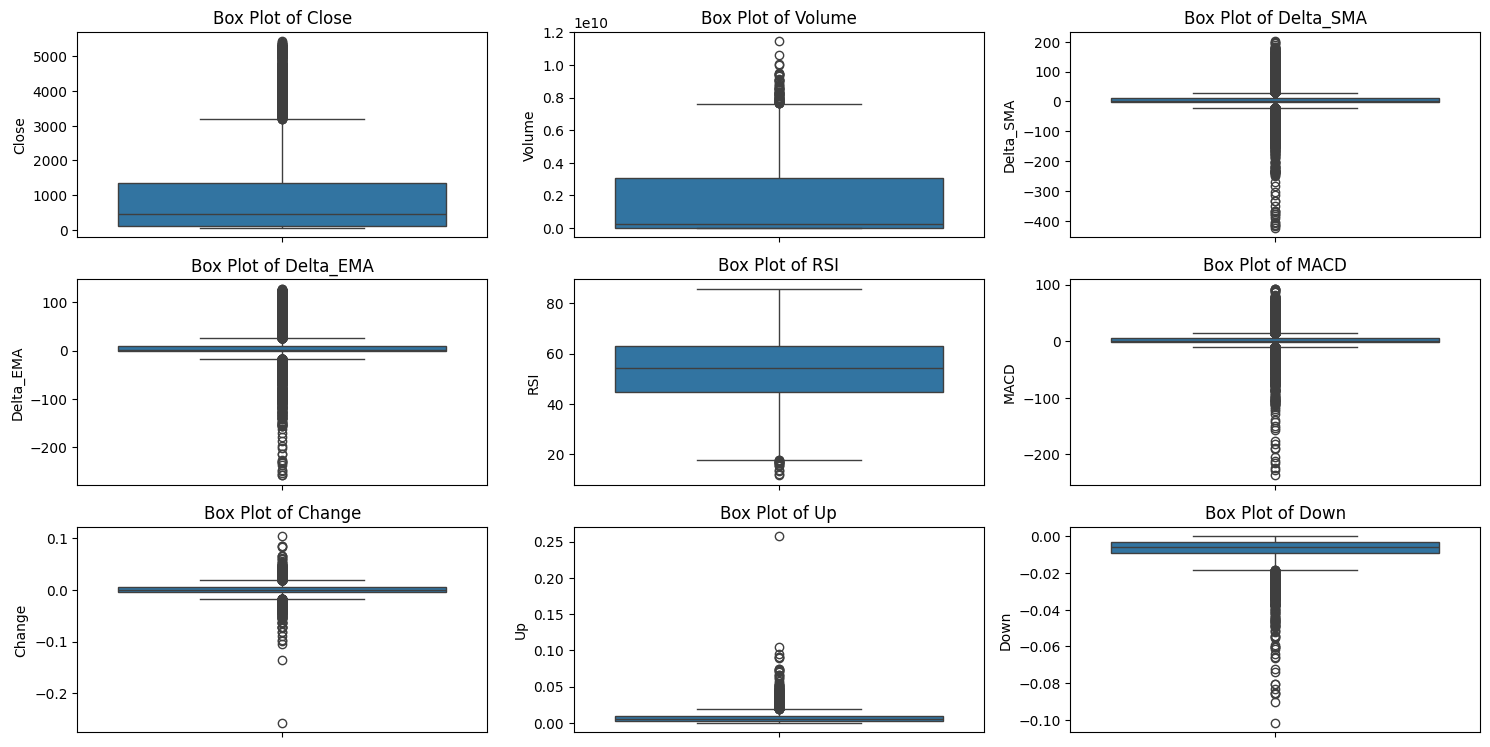

In [29]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 3, i)  # Adjust the grid to fit all plots
    sns.boxplot(y=df2[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

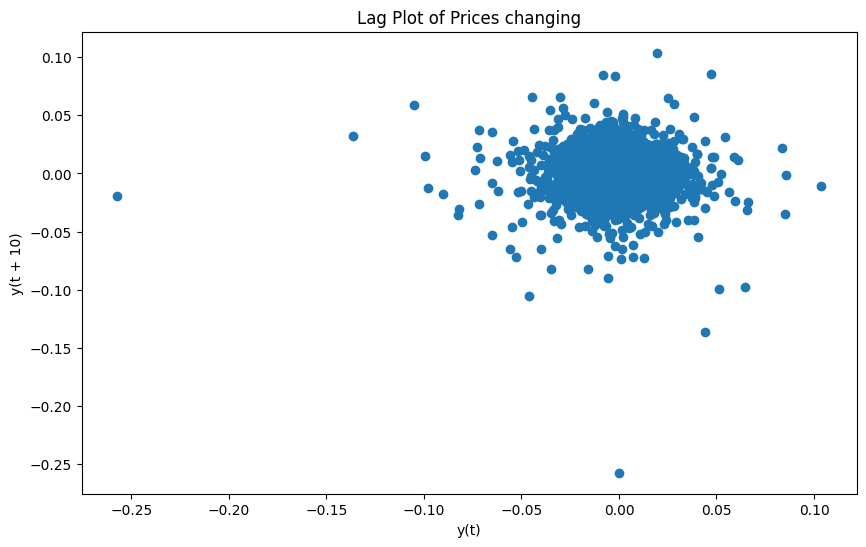

In [37]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 6))
lag_plot(df2['Change'], lag=10)
plt.title('Lag Plot of Prices changing')
plt.show()

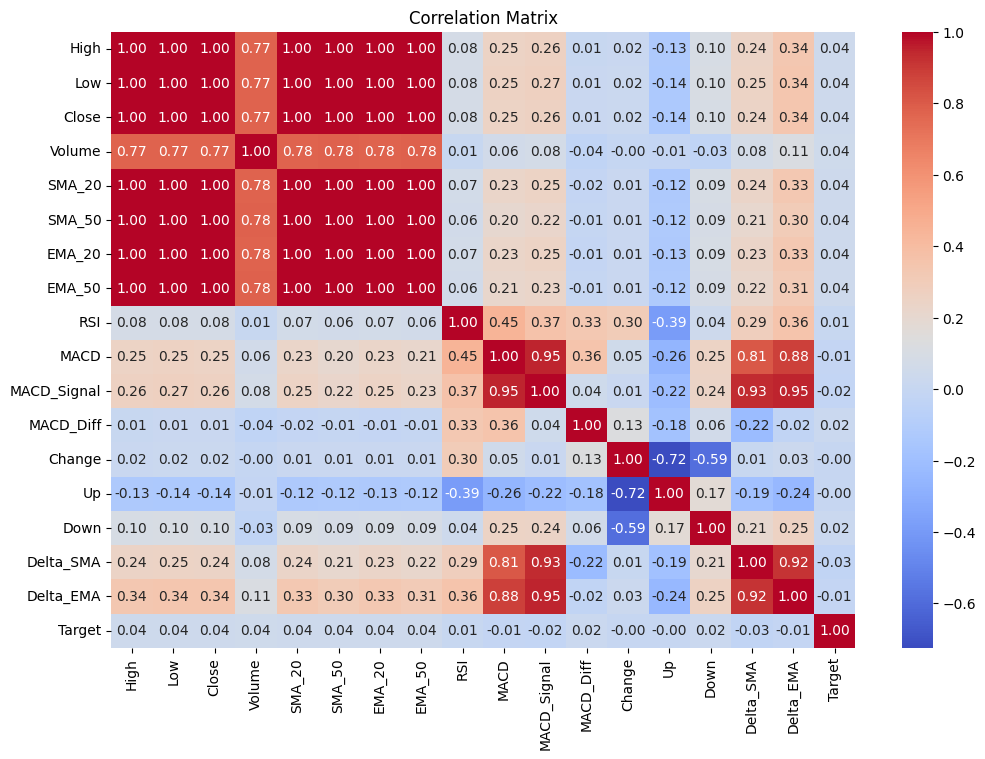

In [38]:
# Correlation matrix

correlation_matrix = df2.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

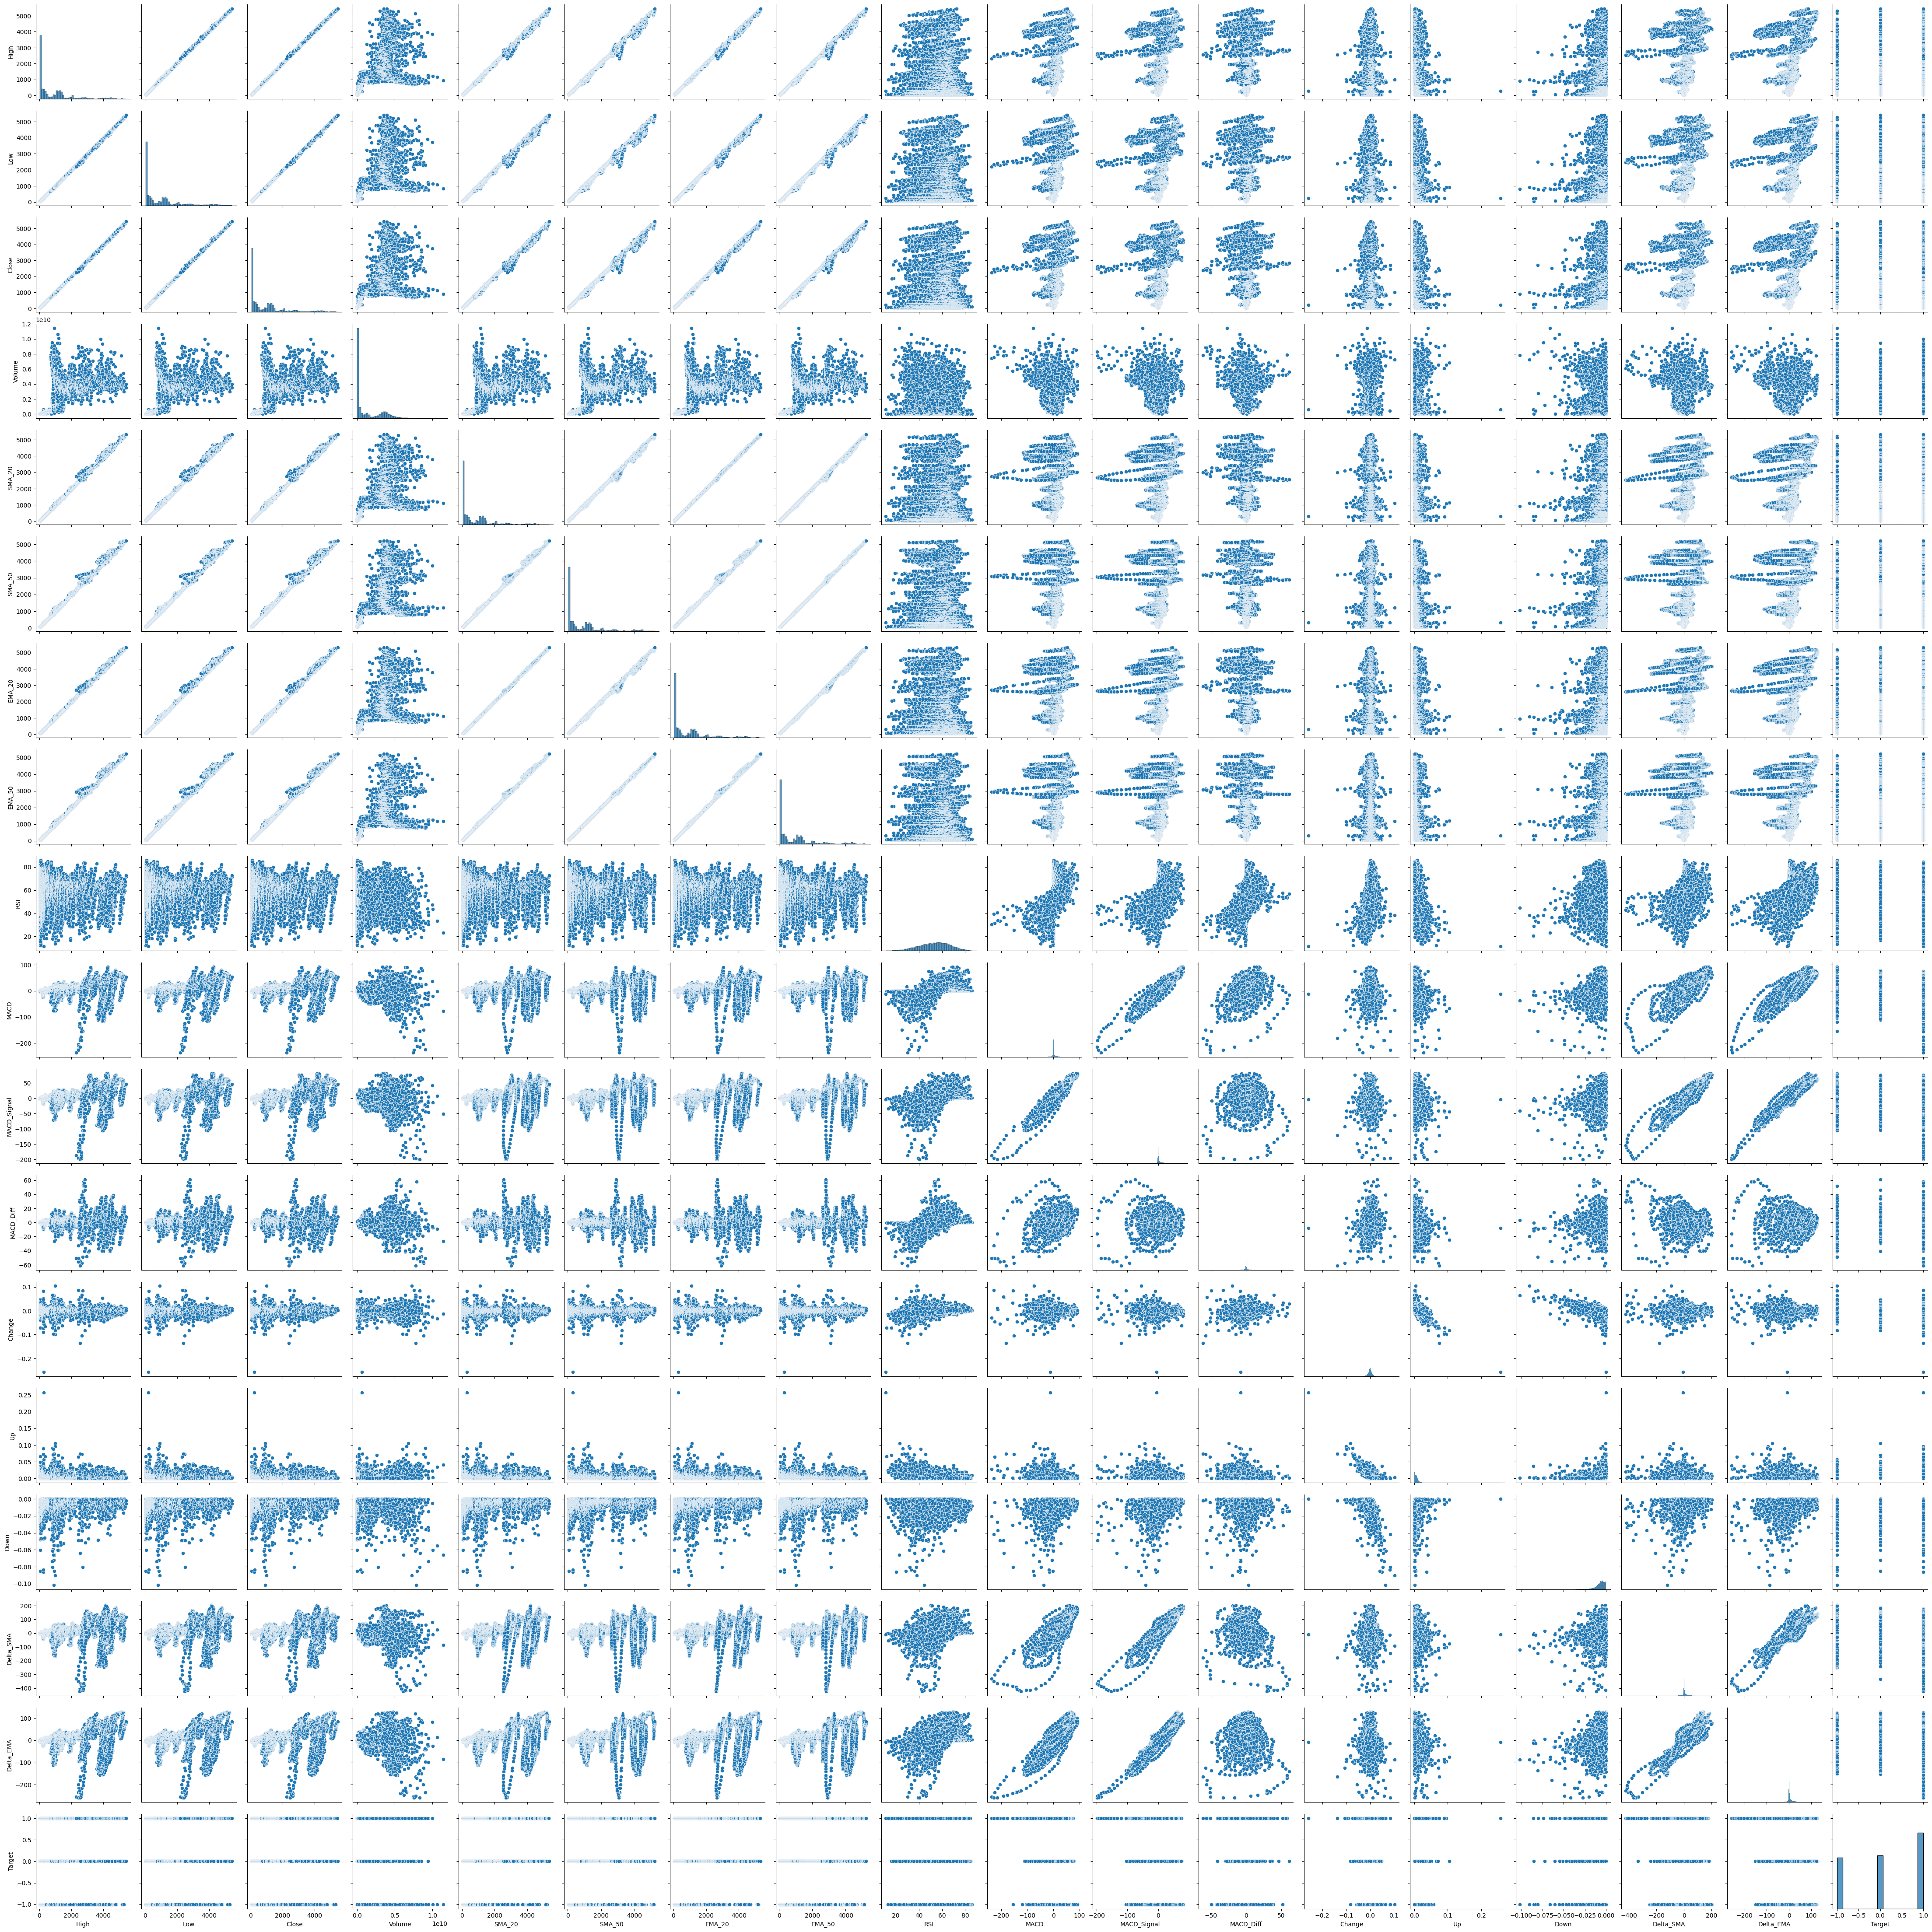

In [39]:
sns.pairplot(df2)

In [40]:
df2 = df2.drop(columns=['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50'], axis=1)

In [41]:
df2.to_csv('usethis.csv')